In [113]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import torch
from scipy.linalg import hadamard
from block import block, generators, plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


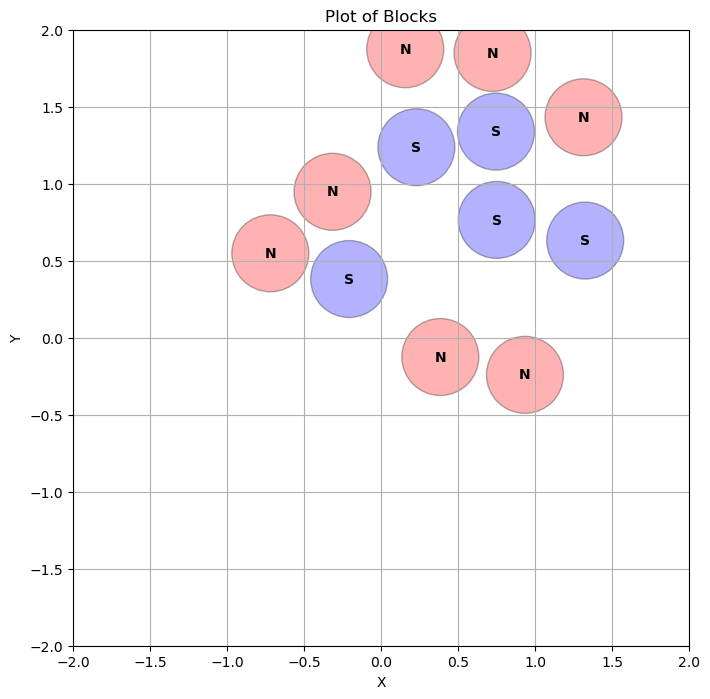

In [154]:
c = generators.gen_rand_block(12, lambda: 0.25)
d = c.mate()
# c.rotate(30)
c.translate(torch.tensor([0, 1]))
c.rotate(30)
plot.plot_faces([c])

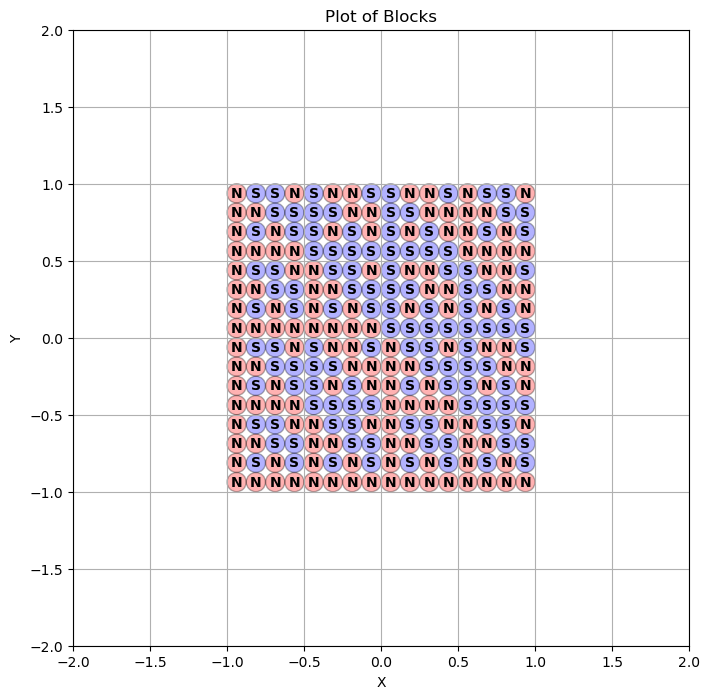

In [147]:
a = generators.gen_had_block(16)
b = a.mate()
A, F = block.calculate_attraction(a, b)
plot.plot_faces([a])

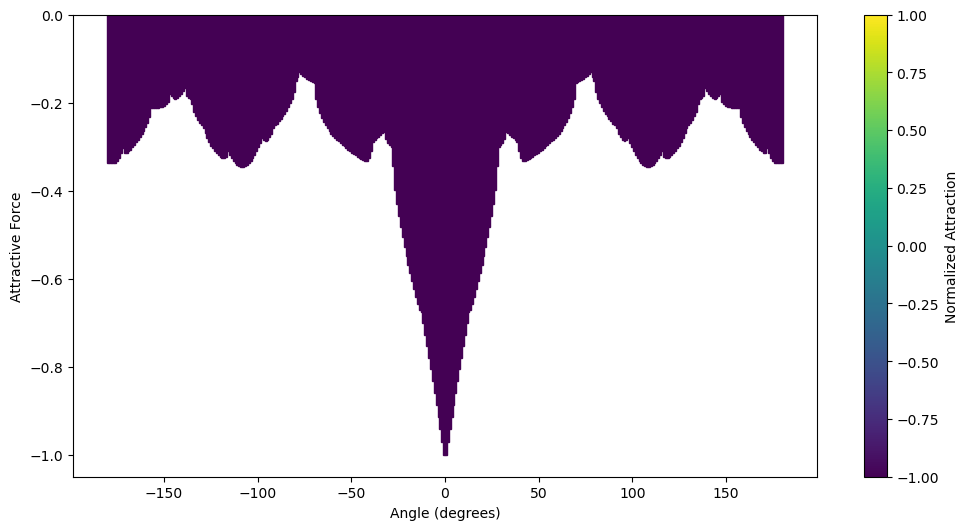

In [150]:
plot.plot_rotation_attraction(c,d, num_angles=360)

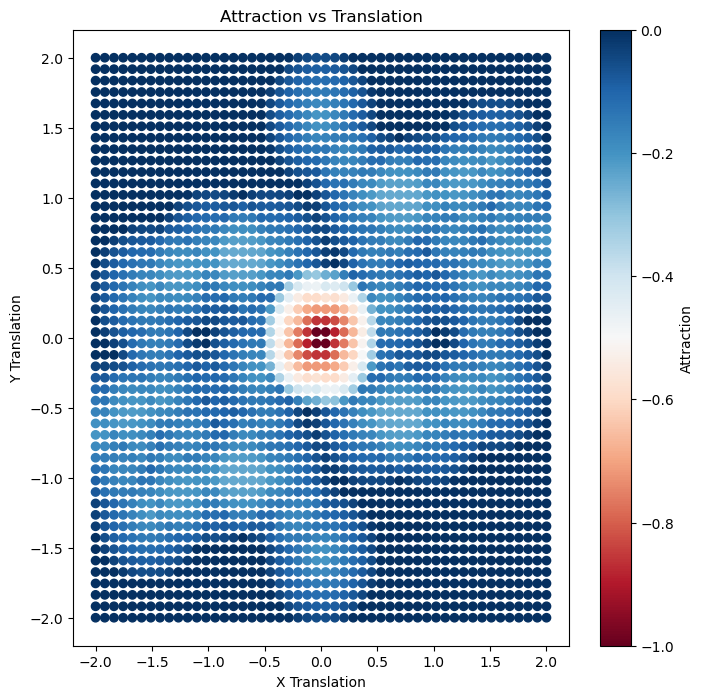

In [152]:
d = c.mate()
plot.plot_translation_attraction(c, d, 50, 50)